In [2]:
from scipy import fft
from scipy.constants import *
import numpy as np
import matplotlib.pyplot as plt

## (a) 

In [3]:
def InitCondition(N, m):
    x = [0 + 2 * pi * i / N for i in range(N)]
    return fft.fft(func(m*x))

## (b)

In [4]:
# Overwriting the function above
def InitCondition(N, m, func=np.sin):
    x = np.array([2 * pi * i / N for i in range(N)])
    fhat = fft.fft(func(m*x))
    # We want N/2 when N is even, and (N-1)/2 when N is odd.
    n_of_nonneg_wave_numbers = 1+int(np.floor(N/2))
    # Slicing does not include the last index, which is exactly what we want
    # since `n_of_positive_numbers` = 1 + index_of_last_positive_wave_number.
    return fhat[0:n_of_nonneg_wave_numbers]

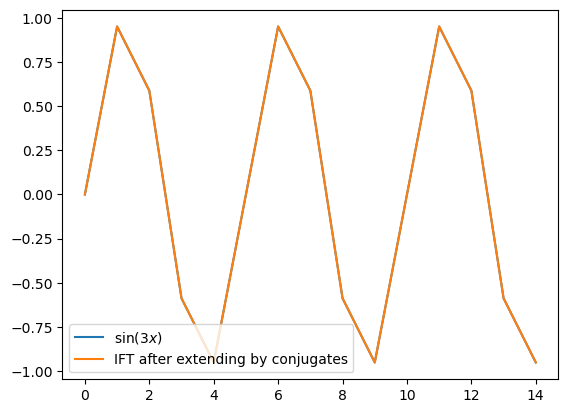

In [5]:
# Must have N odd because we need enough wave numbers
N = 15
m = 3

fhat_nn = InitCondition(N, m)
fhat = np.append(fhat_nn, np.flip(np.conjugate(fhat_nn[1:])))
f = fft.ifft(fhat)

plt.plot( np.sin( [m * 2 * pi / N * i for i in range(N)] ),
         label='$\sin(' + str(m) + 'x)$')
plt.plot(f.real, label='IFT after extending by conjugates')
plt.legend()

## (c)

In [6]:
def appendConj(fhat_nn):
    return np.append(fhat_nn, np.flip(np.conjugate(fhat_nn[1:])))

def ifft_nn(fhat_nn):
    return fft.ifft(appendConj(fhat_nn))

In [6]:
def DerivP(fhat_nn, p):
    ks = np.arange(len(fhat_nn))
    return np.power(1j, p) * np.power(ks, p) * fhat_nn

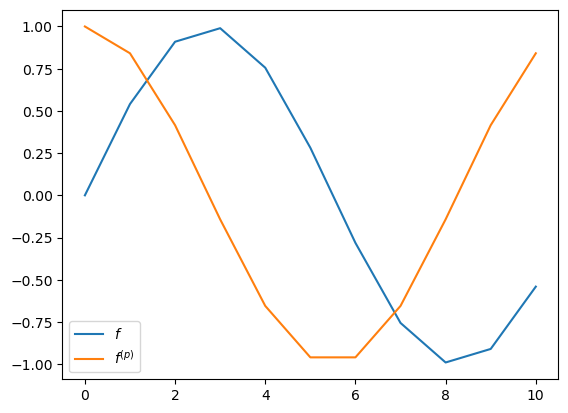

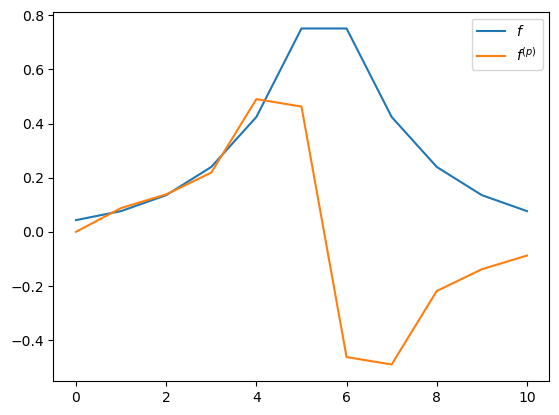

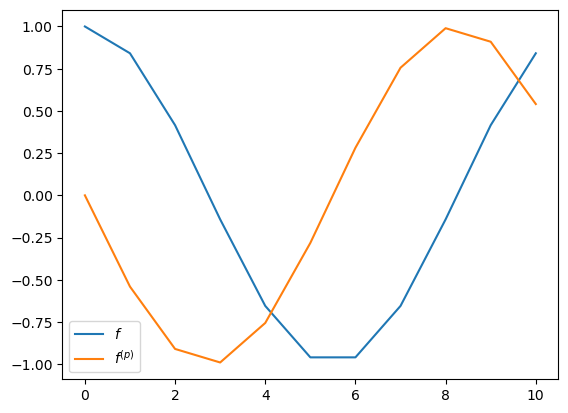

In [7]:
def check(func):
    fhat_nn = InitCondition(11, 1, func=func)
    plt.plot(ifft_nn(fhat_nn), label='$f$')
    p = 1
    plt.plot(ifft_nn(DerivP(fhat_nn, p)), label='$f^{(p)}$')
    plt.legend()

check(np.sin)
plt.show()
check(lambda x: [np.exp(-np.abs(i-pi)) for i in x])
plt.show()
check(np.cos)

In [8]:
def DiffusionSolution(fhat_nn, nu, dt):
    ks = np.arange(len(fhat_nn))
    return np.exp(-nu * np.power(ks, 2) * dt)*fhat_nn

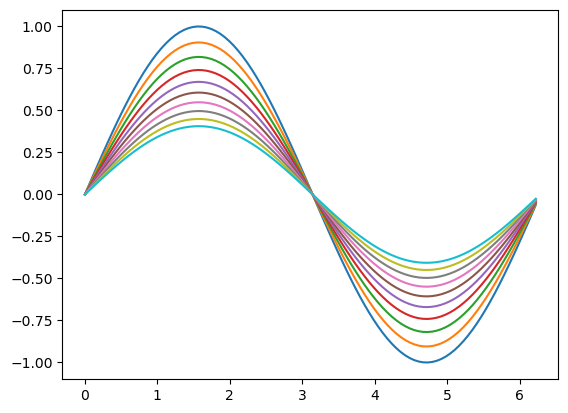

In [9]:
# We know that the uhat = u_0hat * e^{-k**2 t}
def DiffusionAnalyticalSolution(N, nu, t, f0):
    ks = fft.fftfreq(N, 1/N)
    x = np.arange(N) * 2 * pi / N
    fhat = fft.fft(f0(x))
    solhat = np.exp(-nu * np.power(ks, 2) * t)
    sol = fft.ifft(fhat * solhat)
    return sol

N = 101
x = np.arange(N) * 2 * pi / N
dt = 1e-1
for i in range(10):
    plt.plot(x, np.real(DiffusionAnalyticalSolution(N, 1., dt*i, np.sin)))

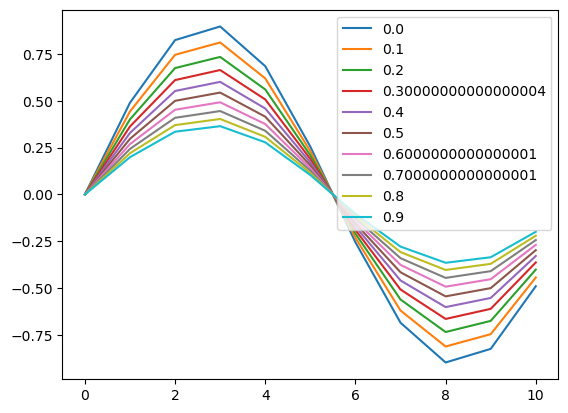

In [10]:
N = 11; m = 1; nu = 1.; dt = 1e-1
x = np.array([2 * pi * i / N for i in range(N)])
fhat_nn = InitCondition(N, m, np.sin)
for i in range(10):
    sol_nn = DiffusionSolution(fhat_nn, nu, dt)
    plt.plot(np.real(ifft_nn(sol_nn)), label=str(i*dt))
    fhat_nn = sol_nn
plt.legend()

## (e)

In [11]:
def BurgersRHS(fhat_nn, nu, dt):
    fprimehat = DerivP(fhat_nn, 1)
    f = ifft_nn(fhat_nn)
    fprime = ifft_nn(fprimehat)
    fdfhat = fft.fft(f * fprime)
    fdfhat = fdfhat[0:len(fhat_nn)]  
    return fdfhat + nu * DerivP(fhat_nn, 2)